In [59]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

from sklearn.manifold import TSNE

%matplotlib inline


import random
def random_hex():
    return ''.join([random.choice('0123456789ABCDEF') for x in range(6)])

In [27]:
df = pd.read_csv('../data/gaussian_final.csv')
df.set_index('player_year',inplace=True)
df.fillna(value=0,inplace=True)

In [28]:
df.head()

,MP_x,2P,3P,3PA,FTr,TS%_x,ORB,TRB,AST%,STL%,BLK%,3PAr,DWS,DBPM,dist,dfga,label
player_year,,,,,,,,,,,,,,,,,
Nick Collison/2015-16,11.8,2.6,0.0,0.1,0.303,0.498,3.5,8.8,9.6,1.1,1.7,0.018,0.7,1.3,0.381348,0.985816,8
Jimmer Fredette/2014-15,10.2,3.8,0.6,3.4,0.271,0.479,0.6,2.8,17.2,1.5,0.3,0.289,0.2,-2.9,0.432442,0.279070,7
Brandon Bass/2016-17,11.1,6.6,0.1,0.2,0.473,0.650,2.7,8.0,5.7,1.2,1.6,0.016,0.6,-0.8,0.463523,0.852273,8
Tyler Zeller/2016-17,10.3,5.3,0.0,0.1,0.247,0.508,2.9,8.5,12.2,0.7,3.3,0.006,0.6,0.8,0.472500,1.477273,8
Justin Holiday/2014-15,11.1,3.1,1.9,6.0,0.191,0.498,0.7,4.0,10.1,3.0,1.4,0.464,1.0,0.5,0.483663,0.514851,12


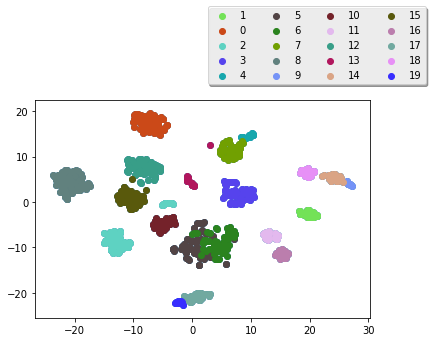

In [63]:
labels = df['label'].values
tsne = TSNE(n_components=2,init='pca',random_state=23).fit_transform(df)
X = pd.DataFrame(tsne)
X['label'] = labels

fontP = FontProperties()
fontP.set_size('small')


fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X[0],X[1],cmap=plt.cm.Spectral)


for label in np.unique(df['label']):
    cluster_frame = X[X['label'] == label]
    ax.scatter(cluster_frame[0],cluster_frame[1],c='#{}'.format(random_hex()),label=label)
    

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.axis('tight')
plt.legend(by_label.values(),by_label.keys(),loc='bottom left',ncol=4,bbox_to_anchor=(0.5,1.05), shadow=True)

In [55]:
len(np.unique(df['label']))

20

In [36]:
cluster_frame = df[df['label'] == 0]

In [64]:
df['label'].value_counts()

8     87
0     74
6     69
12    68
5     68
2     68
3     66
15    62
7     53
10    45
17    39
1     36
18    32
16    30
14    29
11    25
13    19
4     16
19    13
9     12
Name: label, dtype: int64

In [94]:
df.loc['Tristan Thompson/2015-16']

MP_x     27.700000
2P        3.900000
3P        0.000000
3PA       0.000000
FTr       0.576000
TS%_x     0.611000
ORB       4.300000
TRB      11.700000
AST%      4.000000
STL%      0.900000
BLK%      1.800000
3PAr      0.000000
DWS       3.100000
DBPM      1.300000
dist      1.958544
dfga      5.990291
label     2.000000
Name: Tristan Thompson/2015-16, dtype: float64